# Prediksi Jenis Wine Berdasarkan Karakteristik Kimia

Anggur adalah salah satu komoditas pertanian bernilai tinggi yang digunakan dalam berbagai industri, terutama dalam pembuatan wine (anggur fermentasi). Beragam jenis anggur memiliki karakteristik unik yang mempengaruhi cita rasa, aroma, dan kualitas produk akhir. Oleh karena itu, pengenalan jenis anggur secara akurat sangat penting, khususnya dalam proses kontrol kualitas dan klasifikasi produk wine.

Salah satu pendekatan untuk mengidentifikasi jenis anggur adalah melalui analisis kimia. Setiap jenis anggur memiliki komposisi kimia yang khas, seperti kadar alkohol, asam malat, fenol, flavonoid, dan mineral. Perbedaan ini dapat diukur secara laboratorium dan digunakan sebagai fitur numerik untuk mengelompokkan atau memprediksi jenis anggur.


## Data Understanding

### Pengumpulan Data

Dataset diambil dari link:

https://archive.ics.uci.edu/dataset/109/wine

Dataset ini berisi hasil analisis kimia dari wine dari tiga varietas berbeda yang ditanam di wilayah yang sama di Italia. Tujuannya ialah untuk mengklasifikasikan wine berdasarkan karakteristik kimianya.

In [1]:
pip install ucimlrepo

In [7]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)

## data (as pandas dataframes)
data = wine.data.original
  # menyimpan hasil komputasi ke dalam csv
data.to_csv("wine_data.csv", index=True)



{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

### Visualisasi Data

In [5]:
display(data)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


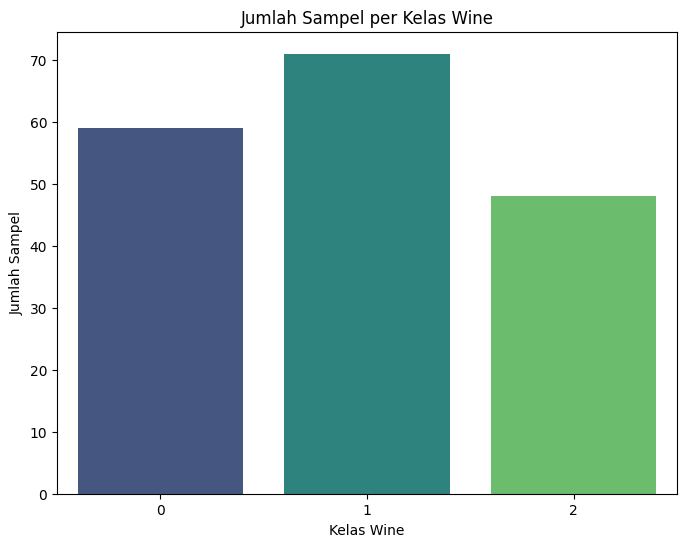

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load dataset wine
wine_data = load_wine()
df_wine = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df_wine['target'] = wine_data.target

# Visualisasi jumlah sampel per kelas
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df_wine, palette='viridis')
plt.title('Jumlah Sampel per Kelas Wine')
plt.xlabel('Kelas Wine')
plt.ylabel('Jumlah Sampel')
plt.show()


<Figure size 1200x1000 with 0 Axes>

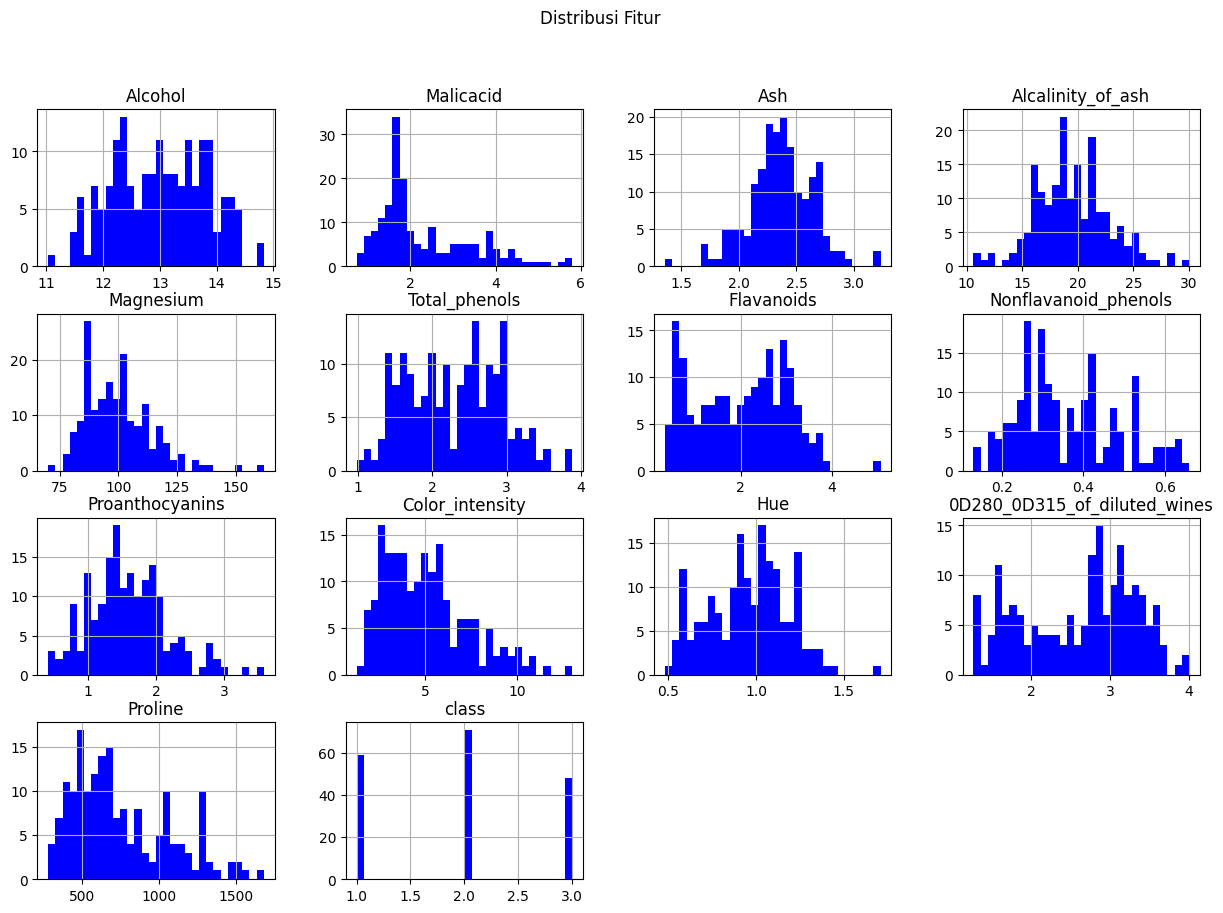

In [12]:
# Visualisasi distribusi fitur dengan histogram
plt.figure(figsize=(12, 10))
data.hist(bins=30, figsize=(15, 10), color='blue')
plt.suptitle('Distribusi Fitur')
plt.show()

### Penjelasan Fitur dan Variabel

Dataset ini memiliki 13 fitur kimia dari sampel wine (anggur) dan satu target class

#### Variabel Independen

| Nama Fitur                     | Tipe Data |  Kategori | Deskripsi                                                                   |
| ------------------------------ | --------- | ------------- | --------------------------------------------------------------------------- |
| `alcohol`                      | float64   | Numerik       | Persentase kadar alkohol dalam wine                                         |
| `malic_acid`                   | float64   | Numerik       | Kandungan asam malat (rasa asam)                                            |
| `ash`                          | float64   | Numerik       | Kandungan abu (sisa pembakaran bahan organik)                               |
| `alcalinity_of_ash`            | float64   | Numerik       | Tingkat alkalinitas dari abu                                                |
| `magnesium`                    | float64   | Numerik       | Kandungan magnesium (mineral)                                               |
| `total_phenols`                | float64   | Numerik       | Total kandungan senyawa fenol                                               |
| `flavanoids`                   | float64   | Numerik       | Jenis senyawa fenol: flavonoid                                              |
| `nonflavanoid_phenols`         | float64   | Numerik       | Senyawa fenol non-flavonoid                                                 |
| `proanthocyanins`              | float64   | Numerik       | Zat antioksidan dari kelompok tanin                                         |
| `color_intensity`              | float64   | Numerik       | Intensitas warna wine                                                       |
| `hue`                          | float64   | Numerik       | Rona warna (perubahan warna dalam waktu)                                    |
| `od280/od315_of_diluted_wines` | float64   | Numerik       | Rasio penyerapan sinar UV pada dua panjang gelombang (ciri khas kimia wine) |
| `proline`                      | float64   | Numerik       | Kandungan asam amino prolin                                                 |

#### Variabel Dependen (label output)

| Nama     | Tipe Data | Tipe Kategori       | Deskripsi                                                                                                     |
| -------- | --------- | ------------------- | ------------------------------------------------------------------------------------------------------------- |
| `target` | int64     | Kategorikal Nominal | Jenis wine berdasarkan hasil klasifikasi. Nilai: <br>0 = Wine Class 0<br>1 = Wine Class 1<br>2 = Wine Class 2 |



In [6]:
data.shape

(178, 14)

Pada data terdapat 178 baris dan 14 kolom

## Preprocessing Data

### Transformasi Data

Dataset Wine memiliki label kelas (kolom target) yang berupa angka 0, 1, dan 2, yang mewakili tiga jenis wine berbeda. Angka-angka tersebut adalah representasi numerik dari kategori.

Untuk memahami data lebih intuitif, kita bisa mengembalikan label numerik tersebut ke bentuk kategori teks yang merepresentasikan nama kelas wine.



In [13]:
from sklearn.datasets import load_wine
import pandas as pd

# Ambil dataset
wine_data = load_wine()

# Buat DataFrame
data_before = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Tambahkan label numerik
data_before['target'] = wine_data.target

# Mapping nilai target ke nama kelas (misal: Wine Class_0, Class_1, Class_2)
target_mapping = {0: 'Class_0', 1: 'Class_1', 2: 'Class_2'}
data_before['target'] = data_before['target'].replace(target_mapping)

# Tampilkan 20 baris pertama
print(data_before.head(20))


    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0     14.23        1.71  2.43               15.6      127.0           2.80   
1     13.20        1.78  2.14               11.2      100.0           2.65   
2     13.16        2.36  2.67               18.6      101.0           2.80   
3     14.37        1.95  2.50               16.8      113.0           3.85   
4     13.24        2.59  2.87               21.0      118.0           2.80   
5     14.20        1.76  2.45               15.2      112.0           3.27   
6     14.39        1.87  2.45               14.6       96.0           2.50   
7     14.06        2.15  2.61               17.6      121.0           2.60   
8     14.83        1.64  2.17               14.0       97.0           2.80   
9     13.86        1.35  2.27               16.0       98.0           2.98   
10    14.10        2.16  2.30               18.0      105.0           2.95   
11    14.12        1.48  2.32               16.8       95.0     